# Machine Learning Regression Model

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## Load the data

In [46]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [47]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [48]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

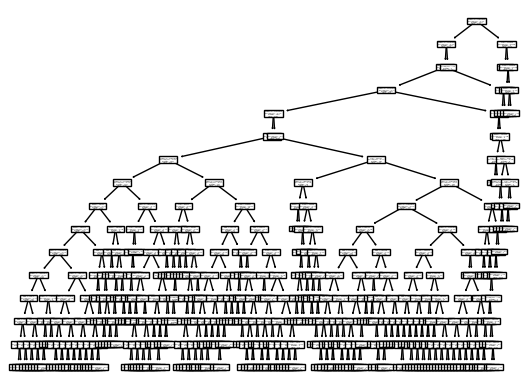

In [49]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [50]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549143,0.081958
2016-12-09,0.321692,0.330148
2016-12-12,1.286112,0.081958
2016-12-13,-0.478622,0.206834
2016-12-14,-0.159789,0.206834
...,...,...
2023-03-09,-1.500467,-1.058574
2023-03-10,2.099087,0.420296
2023-03-13,2.634307,0.315103


### Evaluate the model: compare predictions with the reality

In [51]:
model_dt.score(X=explanatory, y=target)

0.5431115880820776

In [52]:
error = df_predictions.change_tomorrow - df_predictions.prediction
error.sum().round(2)

-0.0

In [53]:
error_squared = error**2
error_squared.sum()

2405.7951012855865

In [54]:
error_squared.mean()

1.5265197343182655

In [55]:
error_squared_mean = error_squared.mean()
error_squared_mean

1.5265197343182655

In [56]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

1.235524072739283

In [57]:
error.std()

1.235916240364693

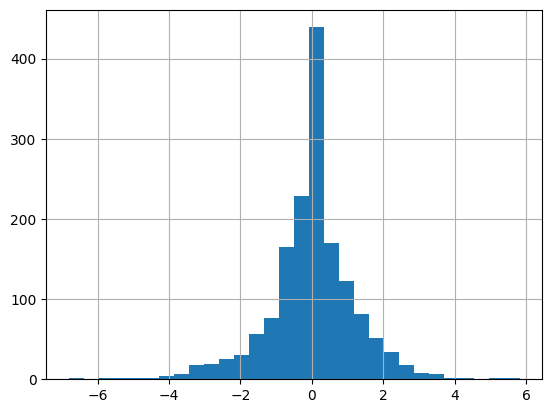

In [58]:
error.hist(bins=30);

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png)

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [59]:
import pickle

In [60]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)